WEEK 4 PART 2

DATA SCIENCE TEAM: Gabriel Campos, Victor Torres, Kossi Akplaka, Heleine Fouda

## Introduction

For this assignment, we have chosen the corpus "I have a dream" by Martin Luther King Jr. on August 28, 1963. This speech is widely considered the greatest speech of the 20th century.

In this assignment, we will examine:

- How many total unique words are in the corpus?
- Taking the most common words, how many unique words represent half of the total words in the corpus?
- Identify the 200 highest frequency words in this corpus.
- Create a graph that shows the relative frequency of these 200 words.
- Does the observed relative frequency of these words follow Zipf’s law? Explain.
- In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”





## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import requests
import nltk
from nltk.corpus import stopwords

## Getting the data

We got the corpus text from https://www.americanrhetoric.com/speeches/mlkihaveadream.htm

In [9]:
response = requests.get("https://raw.githubusercontent.com/GitableGabe/DATA_620_Collab/main/Kossi%20Akplaka/Week%204%20Part%202/dream.txt")
speech_data = response.text

## Number of unique words in the corpus

In [10]:
# Convert text to lowercase
speech_data = speech_data.lower()

# Remove punctuation using regex
speech_data = re.sub(r'[^\w\s]', '', speech_data)

# Split text into words
words = speech_data.split()

# Use a counter to get unique words
unique_words = Counter(words)

# Return the number of unique words
unique_word_count = len(unique_words)

# Print the unique word
print("Total unique words in the corpus:", unique_word_count)

Total unique words in the corpus: 536


Martin Luther King Jr have used 536 words during his speech

## Taking the most common words, how many unique words represent half of the total words in the corpus?

To determine that, we will sort the words in the corpus by frequency in descending order. Then, we will sum the frequencies progressively until reaching half of the total number of words. Finally, we can count how many unique words are required to achieve this cumulative frequency.

In [4]:
# Function to preprocess text and count unique words
def count_half_unique_words(text):
    # Sort words by frequency in descending order
    sorted_word_freq = sorted(unique_words.items(), key=lambda x: x[1], reverse=True)

    # Calculate total number of words
    total_words = len(words)

    # Calculate half of the total words
    half_total_words = total_words / 2

    # Calculate cumulative frequency until reaching half of total words
    cumulative_count = 0
    unique_words_count = 0

    for word, freq in sorted_word_freq:
        cumulative_count += freq
        unique_words_count += 1
        if cumulative_count >= half_total_words:
            break

    return unique_words_count

# Call the function with speech_data
half_unique_words_count = count_half_unique_words(speech_data)
print("Number of unique words representing half of the total words:", half_unique_words_count)

Number of unique words representing half of the total words: 37


The speech relies heavily on approximately 37 unique words, highlighting key themes repeatedly.

## Identify the 200 highest frequency words in this corpus

In [5]:
# Get the 200 most common words
top_200 = unique_words.most_common(200)

# Print top 10
top_10 = unique_words.most_common(10)
top_10

[('the', 103),
 ('of', 99),
 ('to', 59),
 ('and', 54),
 ('a', 37),
 ('be', 33),
 ('we', 30),
 ('will', 27),
 ('that', 24),
 ('is', 23)]

The most common words are often used to construct sentences. Let's remove those words from the corpus

In [6]:
Speech_with_no_stop_word = [word for word in words if word not in stopwords.words("english")]

# Use a counter to get unique words
unique_words = Counter(Speech_with_no_stop_word)

# Get the 200 most common words
top_200 = unique_words.most_common(200)

# Print top 10
top_10 = unique_words.most_common(10)
top_10

[('freedom', 20),
 ('negro', 13),
 ('one', 13),
 ('let', 13),
 ('day', 12),
 ('ring', 12),
 ('dream', 11),
 ('nation', 10),
 ('come', 10),
 ('every', 10)]

This top 10 words can now help understand the speech

## Create a graph that shows the relative frequency of these 200 words.

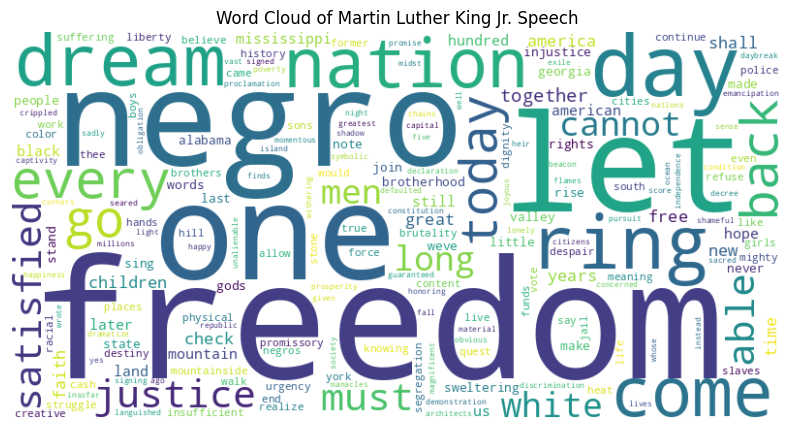

In [7]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_words)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Martin Luther King Jr. Speech')
plt.show()

The word cloud reveals powerful words like "freedom", "every", "today", and "dream", it aligns with key concepts and ideals that Dr. King passionately advocated for.

- Freedom: Central to Dr. King's message was the quest for freedom and equality for all people, regardless of race or background.

- Every: The inclusive use of "every" underscores Dr. King's belief in universal rights and opportunities.

- Today: By emphasizing "today", Dr. King emphasizes the urgency of addressing social injustices in the present moment.


## Does the observed relative frequency of these words follow Zipf's law?

Zipf's law states that in a given corpus of natural language, the frequency of any word is inversely proportional to its rank in the frequency table.

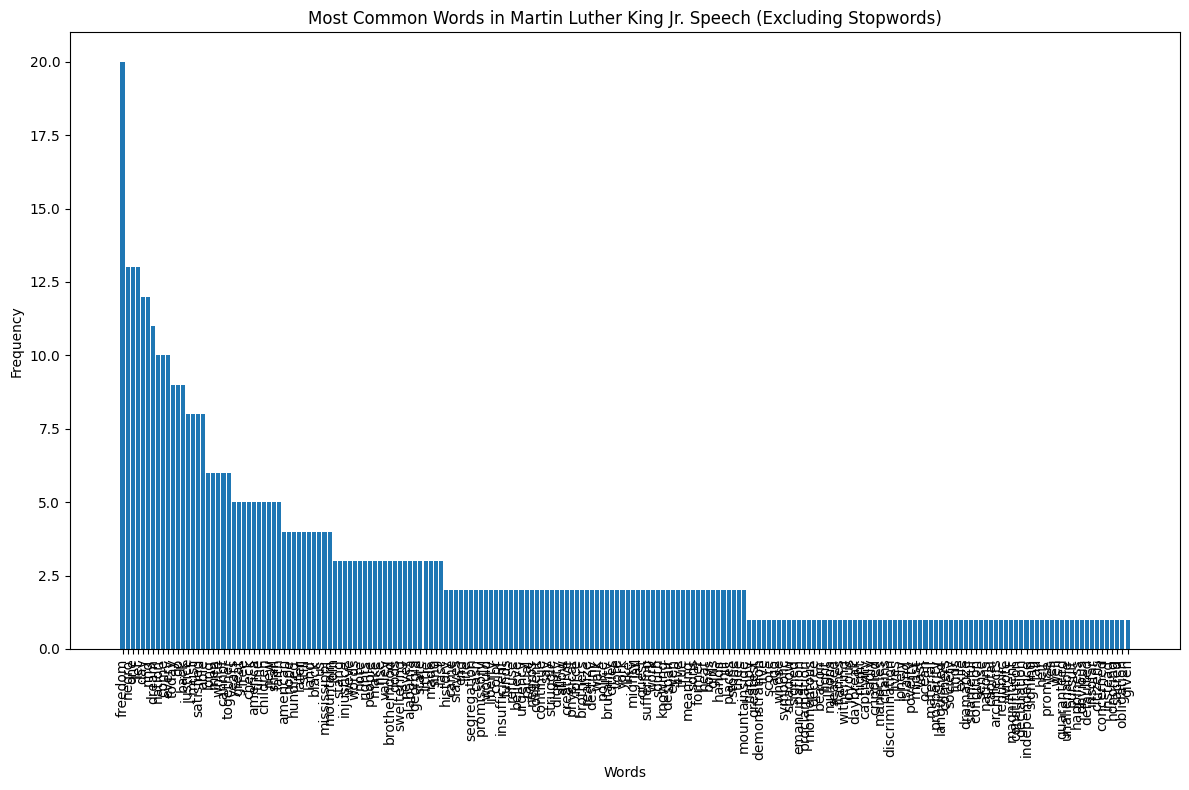

In [8]:
# Extract words and frequencies
top_words, frequencies = zip(*top_200)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Martin Luther King Jr. Speech (Excluding Stopwords)')
plt.tight_layout()
plt.show()

The logarithm curve doesn't form a straight line. This doesn't support the hypothesis that the data follows Zipf's law.



## In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of words in Martin Luther King Jr.'s speech corpus likely differs from "all words in all corpora" in several notable ways:

- The speech is centered around themes of civil rights, freedom, equality, and justice. Therefore, words related to these topics (e.g., 'freedom', 'justice', 'equality') are likely to appear more frequently compared to a general corpus that covers diverse topics.

- Speeches often contain emotionally charged and rhetorical language designed to inspire and persuade. Words like 'dream', 'hope', and 'struggle' may appear more frequently than in a general corpus where the language is more neutral and factual.